In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, desc, asc
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.types import StringType, IntegerType

In [5]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [6]:
data_dir = 'C:/Users/John/PycharmProjects/sparkdemo/data/'

In [7]:
# Reading in the JSON file as a dataframe
user_log = spark.read.json(data_dir + 'sparkify_log_small.json')

# Taking a look at the first 5 records
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [8]:
# To easily see the columns in the data frame we can use printschema
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [9]:
# This command only shows the column name and its data type
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [10]:
# chaining a show() method along with describe() will give show the actual statistic
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [11]:
# To see for a single column
user_log.describe('artist').show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [12]:
user_log.describe('sessionID').show()

+-------+------------------+
|summary|         sessionID|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827561|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [13]:
# to check how many rows are in the dataframe, we can use count() method
user_log.count()

10000

In [14]:
user_log.select("length").show()

+---------+
|   length|
+---------+
|232.93342|
|195.23873|
|196.20526|
|405.99465|
|     null|
|     null|
|154.53995|
|402.93832|
|     null|
|     null|
|223.26812|
|237.11302|
|218.01751|
|237.13914|
|191.68608|
|383.58159|
|     null|
|348.57751|
|146.36363|
|238.18404|
+---------+
only showing top 20 rows



In [22]:
user_log.select('page').show()

+--------+
|    page|
+--------+
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|    Home|
|Settings|
|NextSong|
|NextSong|
|    Home|
|    Home|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|NextSong|
|    Home|
|NextSong|
|NextSong|
|NextSong|
+--------+
only showing top 20 rows



In [27]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- hour: string (nullable = true)



In [34]:
user_log.select('page').drop_duplicates().sort('page').show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [38]:
user_log.select(['userId', 'firstName', 'page', 'song']).where(user_log.userId == '1046').show()

+------+---------+--------+--------------------+
|userId|firstName|    page|                song|
+------+---------+--------+--------------------+
|  1046|  Kenneth|NextSong|Christmas Tears W...|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|
|  1046|  Kenneth|NextSong|      Father And Son|
|  1046|  Kenneth|NextSong|               No. 5|
|  1046|  Kenneth|NextSong|           Seventeen|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|          War on war|
|  1046|  Kenneth|NextSong|   Killermont Street|
|  1046|  Kenneth|NextSong|        Black & Blue|
|  1046|  Kenneth|  Logout|                null|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|     Heads Will Roll|
|  1046|  Kenneth|NextSong|Bleed It Out [Liv...|
|  1046|  Kenneth|NextSong|              Clocks|
|  1046|  Kenneth|NextSong|           Love Rain|
|  1046|  Kenneth|Ne

In [39]:
user_log.select(['userId', 'firstName', 'page', 'song']).where(user_log.userId == '1046').collect()

[Row(userId='1046', firstName='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstName='Kenneth', page='Home', song=None),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstName='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstName='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstName='Kenneth'

In [42]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x/1000.0).hour)

In [43]:
user_log = user_log.withColumn('hour',get_hour(user_log.ts))

In [47]:
user_log.select('hour').show()

+----+
|hour|
+----+
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
|   3|
+----+
only showing top 20 rows



In [52]:
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='3')

In [72]:
songs_in_hour = user_log.filter(user_log.page == 'NextSong').groupby(user_log.hour).count().orderBy(user_log.hour.cast('float'))

In [75]:
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  337|
|   1|  255|
|   2|  271|
|   3|  307|
|   4|  377|
|   5|  371|
|   6|  505|
|   7|  410|
|   8|  320|
|   9|  341|
|  10|  319|
|  11|  306|
|  12|  344|
|  13|  395|
|  14|  324|
|  15|  185|
|  16|  236|
|  17|  238|
|  18|  285|
|  19|  418|
+----+-----+
only showing top 20 rows



In [77]:
songs_in_hour_pd = songs_in_hour.toPandas()

Text(0,0.5,'Songs played')

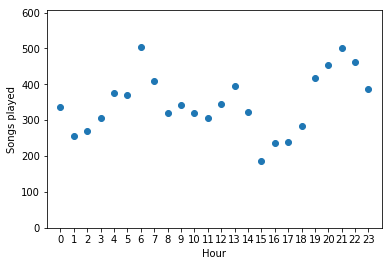

In [79]:
plt.scatter(songs_in_hour_pd['hour'], songs_in_hour_pd['count']);
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd['count']))
plt.xlabel('Hour')
plt.ylabel('Songs played')

In [81]:
user_log_valid = user_log.dropna(how = 'any', subset = ['userId', 'sessionId'])

In [82]:
print(user_log_valid.count())

10000


In [83]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- hour: string (nullable = true)



In [86]:
user_log.select('userId').drop_duplicates().sort('userId').show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [92]:
# user_log_valid = user_log_valid.where(user_log_valid.userId != "")
user_log_valid = user_log_valid.filter(user_log_valid['userId'] != "")

In [93]:
user_log_valid.count()

9664

In [98]:
# user_log_valid.filter(user_log_valid.page == 'Submit Downgrade').show()
user_log_valid.filter("page == 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  16|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [102]:
user_log_valid.select(["userId","firstname","page", "level", "song"]).filter("userId == 1138").collect()

[Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [115]:
flag_downgrade_event = udf(lambda x: 1 if x == 'Submit Downgrade' else 0, IntegerType())

In [116]:
user_log_valid = user_log_valid.withColumn('downgraded', flag_downgrade_event('page'))

In [117]:
user_log_valid.head()

Row(artist='Fabolous / The-Dream', auth='Logged In', firstName='Kevin', gender='M', itemInSession=1, lastName='Gilbert', length=231.54893, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1505550349284, sessionId=1435, song='Throw It In The Bag', status=200, ts=1513783259284, userAgent='Mozilla/5.0 (Windows NT 6.3; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0', userId='1436', hour='20', downgraded=0, phase=0.0)

In [118]:
from pyspark.sql import Window

In [119]:
windowval = Window.partitionBy('userId').orderBy(desc('ts')).rangeBetween(Window.unboundedPreceding, 0)

In [120]:
user_log_valid = user_log_valid.withColumn('phase', Fsum('downgraded').over(windowval))

In [121]:
user_log_valid.select(["userId","firstname", "ts", "page", "level", "phase"]).where(user_log.userId == "1138").sort("ts").collect()

[Row(userId='1138', firstname='Kelly', ts=1513729066284, page='Home', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731182284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firs